# 1 ) SETUP

# Running the Jupuyter notebook

#2) Preparing the Data
Upload the file in jupyter

In [1]:
import pandas as pd
original_data = pd.read_csv("car-data.csv")

In [2]:
original_data

,mpg,cyl,disp,hp,wgt,acc,country,year,make,model
0,18.0,8,307.0,130,3504,12.0,1,70,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1,70,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,1,70,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,1,70,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,1,70,ford,torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,1,82,ford,mustang gl
394,44.0,4,97.0,52,2130,24.6,2,82,vw,pickup
395,32.0,4,135.0,84,2295,11.6,1,82,dodge,rampage
396,28.0,4,120.0,79,2625,18.6,1,82,ford,ranger


In [3]:
original_data.head()

,mpg,cyl,disp,hp,wgt,acc,country,year,make,model
0,18.0,8,307.0,130,3504,12.0,1,70,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1,70,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,1,70,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,1,70,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,1,70,ford,torino


In [4]:
original_data.tail()

,mpg,cyl,disp,hp,wgt,acc,country,year,make,model
393,27.0,4,140.0,86,2790,15.6,1,82,ford,mustang gl
394,44.0,4,97.0,52,2130,24.6,2,82,vw,pickup
395,32.0,4,135.0,84,2295,11.6,1,82,dodge,rampage
396,28.0,4,120.0,79,2625,18.6,1,82,ford,ranger
397,31.0,4,119.0,82,2720,19.4,1,82,chevy,s-10


In [5]:
original_data.iloc[1]#Locating the rows

mpg               15.0
cyl                  8
disp             350.0
hp                 165
wgt               3693
acc               11.5
country              1
year                70
make             buick
model      skylark 320
Name: 1, dtype: object

#Cleanup / Validation

In [6]:
#Taking the copy forn cleaning the data
data = original_data
cols = {
        "mpg":     "MPG",
        "cyl":     "Cylinders",
        "disp":    "Displacement",
        "hp":      "Horsepower",
        "wgt":     "Weight",
        "acc":     "Acceleration",
        "country": "Country",
        "year":    "Year", 
        "make":    "Make",
        "model":   "Model"
}

In [7]:
data = data.rename(columns=cols)
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Country,Year,Make,Model
0,18.0,8,307.0,130,3504,12.0,1,70,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1,70,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,1,70,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,1,70,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,1,70,ford,torino


In [8]:
data.isnull()#it will list oiut the file having false or true if the data is null
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Country         0
Year            0
Make            0
Model           2
dtype: int64

In [9]:
#View the datatypes
data.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Country           int64
Year              int64
Make             object
Model            object
dtype: object

In [10]:
data.iloc[32]

MPG              25.0
Cylinders           4
Displacement     98.0
Horsepower          ?
Weight           2046
Acceleration     19.0
Country             1
Year               71
Make             ford
Model           pinto
Name: 32, dtype: object

In [11]:
data.replace(to_replace="?",value=True,inplace=True)

In [12]:
data = data.dropna()

In [13]:
data['Horsepower'] = data['Horsepower'].astype(int)

In [14]:
data["Year"] = data["Year"].add(1900)

In [15]:
data.head(1)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Country,Year,Make,Model
0,18.0,8,307.0,130,3504,12.0,1,1970,chevrolet,chevelle malibu


In [16]:
#Dropping make and model columns
data = data.drop("Make",axis=1)
data = data.drop("Model",axis=1)

In [17]:
data['Country'] = data['Country'].map({1: 'USA', 2: 'Europe', 3:'Japan'})
data = pd.get_dummies(data, columns=['Country'], prefix='',prefix_sep='')

In [18]:
data.corr(numeric_only=True)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Europe,Japan,USA
MPG,1.000000,-0.775046,-0.803852,-0.754165,-0.831279,0.419080,0.578416,0.261298,0.440111,-0.566850
Cylinders,-0.775046,1.000000,0.950542,0.822142,0.895706,-0.505074,-0.348576,-0.355710,-0.392531,0.602420
Displacement,-0.803852,0.950542,1.000000,0.872560,0.932606,-0.543341,-0.369835,-0.376855,-0.429873,0.649706
Horsepower,-0.754165,0.822142,0.872560,1.000000,0.838358,-0.673824,-0.410617,-0.284901,-0.283197,0.456945
Weight,-0.831279,0.895706,0.932606,0.838358,1.000000,-0.416506,-0.305295,-0.301669,-0.437273,0.596401
Acceleration,0.419080,-0.505074,-0.543341,-0.673824,-0.416506,1.000000,0.286349,0.205670,0.106334,-0.249502
Year,0.578416,-0.348576,-0.369835,-0.410617,-0.305295,0.286349,1.000000,-0.023623,0.191475,-0.138201
Europe,0.261298,-0.355710,-0.376855,-0.284901,-0.301669,0.205670,-0.023623,1.000000,-0.227662,-0.603089
Japan,0.440111,-0.392531,-0.429873,-0.283197,-0.437273,0.106334,0.191475,-0.227662,1.000000,-0.639427
USA,-0.566850,0.602420,0.649706,0.456945,0.596401,-0.249502,-0.138201,-0.603089,-0.639427,1.000000


<Axes: xlabel='Weight', ylabel='MPG'>

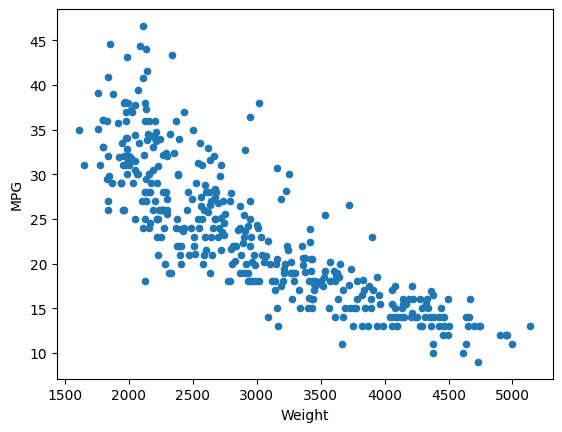

In [19]:
data.plot(kind="scatter", x="Weight", y ="MPG")

<Axes: xlabel='Displacement', ylabel='MPG'>

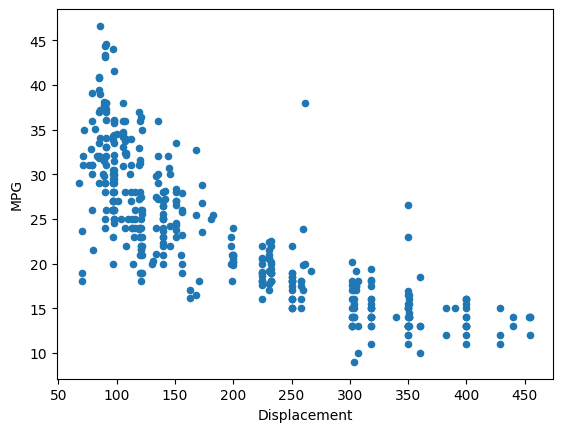

In [20]:
data.plot(kind="scatter", x="Displacement", y ="MPG")

<Axes: xlabel='Horsepower', ylabel='MPG'>

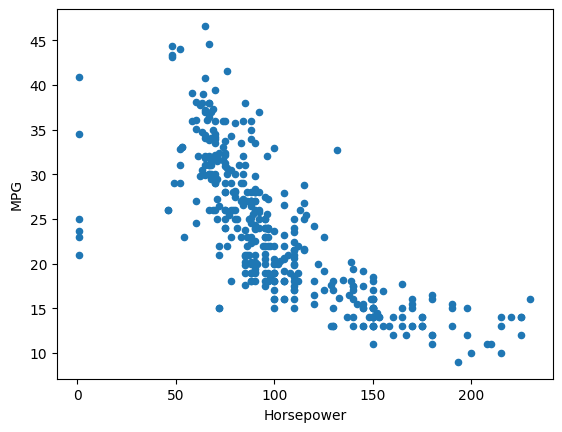

In [21]:
data.plot(kind="scatter", x="Horsepower", y ="MPG")

<Axes: xlabel='Cylinders', ylabel='MPG'>

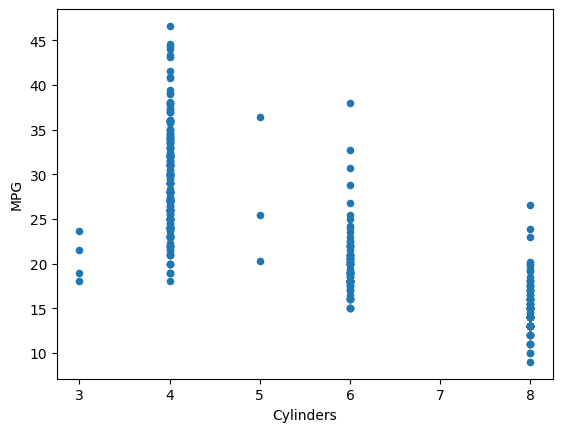

In [22]:
data.plot(kind="scatter", x="Cylinders", y ="MPG")

In [23]:
print("USA: ",data["USA"].sum())
print("Europe: ",data["Europe"].sum())
print("Japan: ",data["Japan"].sum())

USA:  249
Europe:  70
Japan:  77


In [24]:
#Dropping make and model columns
data = data.drop("USA",axis=1)
data = data.drop("Europe",axis=1)
data = data.drop("Japan",axis=1)

In [25]:
data.head(1)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
0,18.0,8,307.0,130,3504,12.0,1970


***4. MODEL TRAINING AND EVALUATION***

In [26]:
#Data Split(training & testing)
print(len(data))
training_data = data.head(310)
testing_data = data.head(80)

396


***1 MODEL 1 : Linear regression with single variable**

In [27]:
#y = mx + b
#x = horsepower
#y = mpg

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

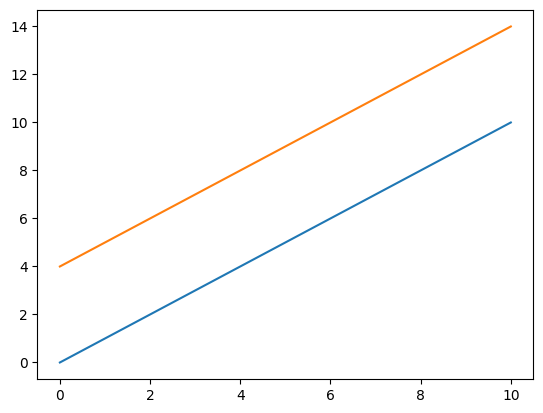

In [29]:
x = np.linspace(0,10)
plt.plot(x , x+ 0)
plt.plot(x , x+ 4)

In [30]:
model1 = tf.keras.Sequential()

In [31]:
#Layer1
layer1 = tf.keras.layers.Dense(1, input_shape=(1,))
model1.add(layer1)

C:\Users\gokul\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
tf.keras.utils.plot_model(model1, show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [34]:
!pip install pydot


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
tf.keras.utils.plot_model(model1, show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [37]:
#Compile mode
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='mean_absolute_error')

In [38]:
#Train Model
history1 = model1.fit(training_data['Horsepower'],training_data['MPG'],epochs=100,validation_split=0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 176.4797 - val_loss: 101.1099
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 84.5313 - val_loss: 18.5418
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 16.4818 - val_loss: 23.3753
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 26.6102 - val_loss: 9.0602
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12.0869 - val_loss: 13.3292
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 10.5059 - val_loss: 9.1629
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.0064 - val_loss: 13.4645
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 10.4479 - val_loss: 8.9826
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.0973 - val_loss: 9.0767
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.2029 - val_loss: 12.6278
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 9.6503 - val_loss: 8.9315
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - los

In [39]:
#Plot
def Plot_HPvsMPG(data_hp, data_mph,pred_hp, pred_mpg):
    plt.scatter(data_hp, data_mph, label='Data')
    plt.plot(pred_hp, pred_mpg, color='k',label='Predictions')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()

In [41]:
#Real Data
hp1 = training_data["Horsepower"]
mgp1 = training_data["MPG"]


hp2 = tf.linspace(0, 250 , 251)
mgp2 = model1.predict(hp2)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


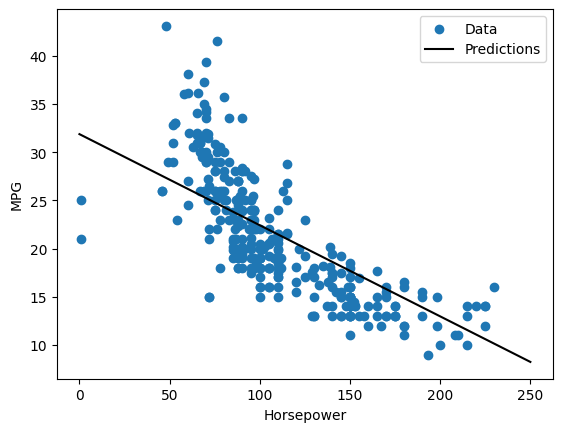

In [42]:
Plot_HPvsMPG(hp1,mgp1, hp2, mgp2)

In [43]:
testing  = model1.evaluate(testing_data['Horsepower'],testing_data['MPG'], verbose =0)
training = pd.DataFrame(history1.history).iloc[99]['loss']

results = {}
results ['Baseline'] = training, testing

In [44]:
pd.DataFrame(results, index=['training loss', 'testing loss']).T

,training loss,testing loss
Baseline,3.8642,2.953709
